## English data

In [2]:
import re
import easygui
root = easygui.fileopenbox(default = "C:/Users/user") # open file

In [3]:
text = open(root, encoding = "UTF-8-sig").read().lower() # read text and lower it
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer("[a-zA-Z]*[-]?[a-zA-Z]+[-]?[a-zA-Z]*") # identify possible words including compound ones
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("english")
token_list = [ss.stem(token) # lemmatized the tokens so that different forms of word type are unified
              for token in regexp.tokenize(text)
             ]

In [4]:
token_list_cleaned = [token for token in token_list if len(token) > 1 or token in ["i","a"] ] # filtrate single letters but according a priori knowledge i and a are accepted
from collections import Counter 
frequency_list = list(Counter(token_list_cleaned).values()) # calculate and get frequency of word tokens
word_list = list(Counter(token_list_cleaned).keys())
len_list = [len(word) for word in word_list] # calculate length of each word type

In [5]:
sorted_data_en = sorted(zip(word_list,frequency_list,len_list), key = lambda x : -x [2], reverse = True) # sort word frequency by length
word_freq = {}
for pairs in sorted_data_en:
    word_freq[pairs[0]] = pairs[1] # make dictionary of word frequency

In [6]:
initial_frequency = list(word_freq.values())[0] # retrieve the frequency of the shortest word
abnormal_word_list = []
abnormal_word_len = []
abnormal_word_freq = []
for word, freq in word_freq.items():
    if initial_frequency >= freq: # if the frequency of the following word is smaller, than the standard frequency will be reset
        initial_frequency = freq 
    else:
        abnormal_word_list.append(word) # if not, the word violates the law
        abnormal_word_freq.append(freq)
        abnormal_word_len.append(len(word))

In [7]:
print(len(abnormal_word_list)) # how many word types violate the law
print((len(abnormal_word_list) / len(word_list))) # and its proportion in regard with all the types
print(abnormal_word_list)

396
0.48175182481751827
['at', 'by', 'of', 'be', 'or', 'to', 'do', 'on', 've', 'in', 'we', 'as', 'if', 'is', 'it', 'up', 'my', 're', 'he', 'an', 'me', 'uk', 'us', 'eu', 'who', 'the', 'and', 'two', 'bbc', 'not', 'she', 'you', 'all', 'how', 'die', 'one', 'bad', 'add', 'get', 'say', 'are', 'for', 'irc', 'has', 'but', 'can', 'aid', 'dog', 'his', 'won', 'hit', 'her', 'age', 'ago', 'fli', 'lie', 'men', 'now', 'had', 'arm', 'man', 'set', 'ask', 'isn', 'was', 'out', 'sky', 'son', 'him', 'cri', 'way', 'air', 'tri', 'due', 'map', 'whi', 'quak', 'warn', 'tell', 'that', 'mani', 'just', 'have', 'what', 'they', 'need', 'like', 'fear', 'toll', 'rise', 'even', 'know', 'ruin', 'care', 'will', 'veri', 'long', 'term', 'work', 'help', 'home', 'them', 'both', 'said', 'area', 'been', 'some', 'with', 'make', 'more', 'also', 'mean', 'road', 'most', 'send', 'team', 'when', 'citi', 'kill', 'save', 'part', 'ecko', 'navi', 'live', 'find', 'from', 'dead', 'wait', 'hour', 'pass', 'this', 'join', 'here', 'slip', 'on

## Spanish data

In [8]:
root = easygui.fileopenbox(default = "C:/Users/user") # open file
text = open(root, encoding = "UTF-8-sig").read().lower() # read and lower the text
import spacy
nlp_es = spacy.load("es_core_news_lg") # load the Spanish model
doc_es = nlp_es(text)
token_list_cleaned = [token.lemma_ for token in doc_es if token.is_alpha] # get lemmatized words made up of characters
frequency_list = list(Counter(token_list_cleaned).values()) # calculate and get frequency of word tokens
word_list = list(Counter(token_list_cleaned).keys())
len_list = [len(word) for word in word_list] # get length of each word token
sorted_data_es = sorted(zip(word_list,frequency_list,len_list), key = lambda x : -x [2], reverse = True) # sort word frequency by length
word_freq = {}
for pairs in sorted_data_es:
    word_freq[pairs[0]] = pairs[1] # make dictionary of word frequency
initial_frequency = list(word_freq.values())[0] # retrieve the frequency of the shortest word
abnormal_word_list = []
abnormal_word_len = []
abnormal_word_freq = []
for word, freq in word_freq.items():
    if initial_frequency >= freq: # if the frequency of the following word is smaller, than the standard frequency will be reset
        initial_frequency = freq 
    else:
        abnormal_word_list.append(word) # if not, the word violates the law
        abnormal_word_freq.append(freq)
        abnormal_word_len.append(len(word))
print(len(abnormal_word_list)) # how many word types violate the law
print((len(abnormal_word_list) / len(word_list))) # and its proportion in regard with all the types
print(abnormal_word_list)

179
0.34689922480620156
['a', 'de', 'el', 'en', 'su', 'él', 'no', 'ya', 'al', 'si', 'que', 'más', 'mil', 'ser', 'uno', 'día', 'del', 'año', 'dos', 'por', 'con', 'ver', 'oms', 'sin', 'red', 'onu', 'este', 'país', 'bajo', 'paso', 'hora', 'para', 'pero', 'zona', 'tres', 'todo', 'afad', 'como', 'vida', 'cero', 'ante', 'otro', 'sirio', 'haber', 'pasar', 'noche', 'temer', 'cifra', 'final', 'mucho', 'estar', 'cinco', 'turco', 'hatay', 'nuevo', 'calle', 'hogar', 'poder', 'entre', 'menos', 'siria', 'aquel', 'hasta', 'según', 'tanto', 'abrir', 'quien', 'tener', 'venir', 'ayuda', 'vídeo', 'pedir', 'grupo', 'gente', 'fuera', 'desde', 'suelo', 'lunes', 'donde', 'medio', 'móvil', 'contra', 'muerto', 'ciento', 'martes', 'alguno', 'tratar', 'dañado', 'número', 'herido', 'herida', 'quedar', 'cuenta', 'decena', 'ciudad', 'españa', 'equipo', 'varios', 'seguir', 'llegar', 'porque', 'grieta', 'imagen', 'puerto', 'grande', 'agency', 'millón', 'enviar', 'tienda', 'llamar', 'turquía', 'persona', 'refugio', 'v

### curve fitting

In [9]:
# retrieve data from English text
len_list_en = []
freq_list_en = []
for pairs in sorted_data_en:
    len_list_en.append(pairs[2])
    freq_list_en.append(pairs[1])

In [10]:
# retrieve data from Spanish text
len_list_es = []
freq_list_es = []
for pairs in sorted_data_es:
    len_list_es.append(pairs[2]) # get length list
    freq_list_es.append(pairs[1]) # get freqeuncy list

In [11]:
import numpy as np
from scipy.optimize import curve_fit
def func(x,a,b,c):
    return b * np.power(a,x) + c # define function for curve fitting

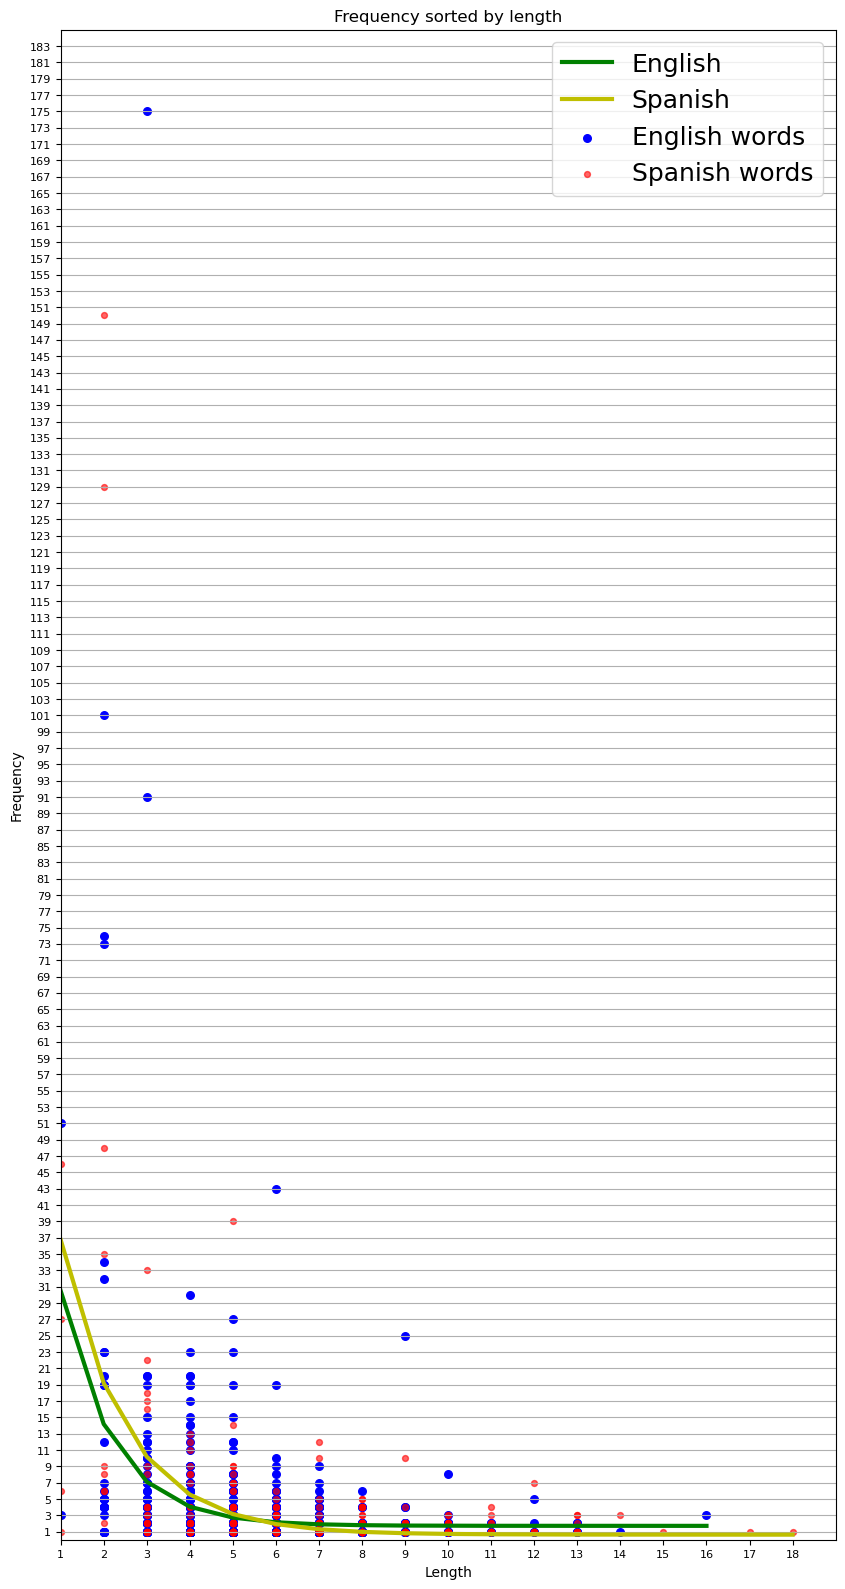

In [12]:
import matplotlib.pyplot as plt

x_en = np.array(len_list_en) # length of all the words
y_en = np.array(freq_list_en) # frequency of all the words
x_es = np.array(len_list_es) 
y_es = np.array(freq_list_es)

plt.figure(figsize = (10,20), dpi = 100)
plt.ylabel("Frequency", fontsize = 10)
plt.xlabel("Length", fontsize = 10)
plt.title("Frequency sorted by length", fontsize = 12)
plt.yticks(range(1,max(max(freq_list_en),max(freq_list_es))+10,2), fontsize = 8)
plt.xticks(range(1,max(max(len_list_es),max(len_list_en))+1,1),fontsize = 8)
plt.axis([1,max(max(len_list_es),max(len_list_en))+1,0,max(max(freq_list_es),max(freq_list_en))+10]) # set the axises and join the zero points of two axises


plt.scatter(x_en, y_en, 30, color = "blue", label = "English words") # scatter of English words
plt.scatter(x_es, y_es, 18, color = "red", alpha = 0.6, label = "Spanish words") # scatter of Spanish words

# apply curve fitting function
popt1, pcov1 = curve_fit(func,x_en,y_en)
y_en_curve = [func(i, popt1[0],popt1[1],popt1[2]) for i in x_en] # calculate y-values for curve fitting
popt2, pcov2 = curve_fit(func,x_es,y_es)
y_es_curve = [func(i, popt2[0],popt2[1],popt2[2]) for i in x_es] # calculate y-values for curve fitting

# draw the plots
plt.plot(x_en,y_en_curve, color = "g", linewidth = "3", linestyle = "-", label = "English") # draw the curve of English words
plt.plot(x_es,y_es_curve, color = "y", linewidth = "3", linestyle = "-", label = "Spanish") # draw the curve of Spanish words

# set annotation
plt.legend(fontsize = 18)

plt.grid(axis = "y") # set grids
plt.show()



### distribution of length of word types in English

In [ ]:
nltk.download("brown")

In [59]:
from nltk.corpus import brown
vocab_en = []
for word in brown.words():
    if word not in vocab_en: # pick out word types
        if re.match("[a-zA-Z]*[-]?[a-zA-Z]+[-]?[a-zA-Z]*",word): # identify words including compound ones
            vocab_en.append(word.lower())
vocab_en_len = Counter([len(word) for word in vocab_en]) # calculate frequency of length
len_list_corpus = list(vocab_en_len.keys())
freq_list_corpus = list(vocab_en_len.values())

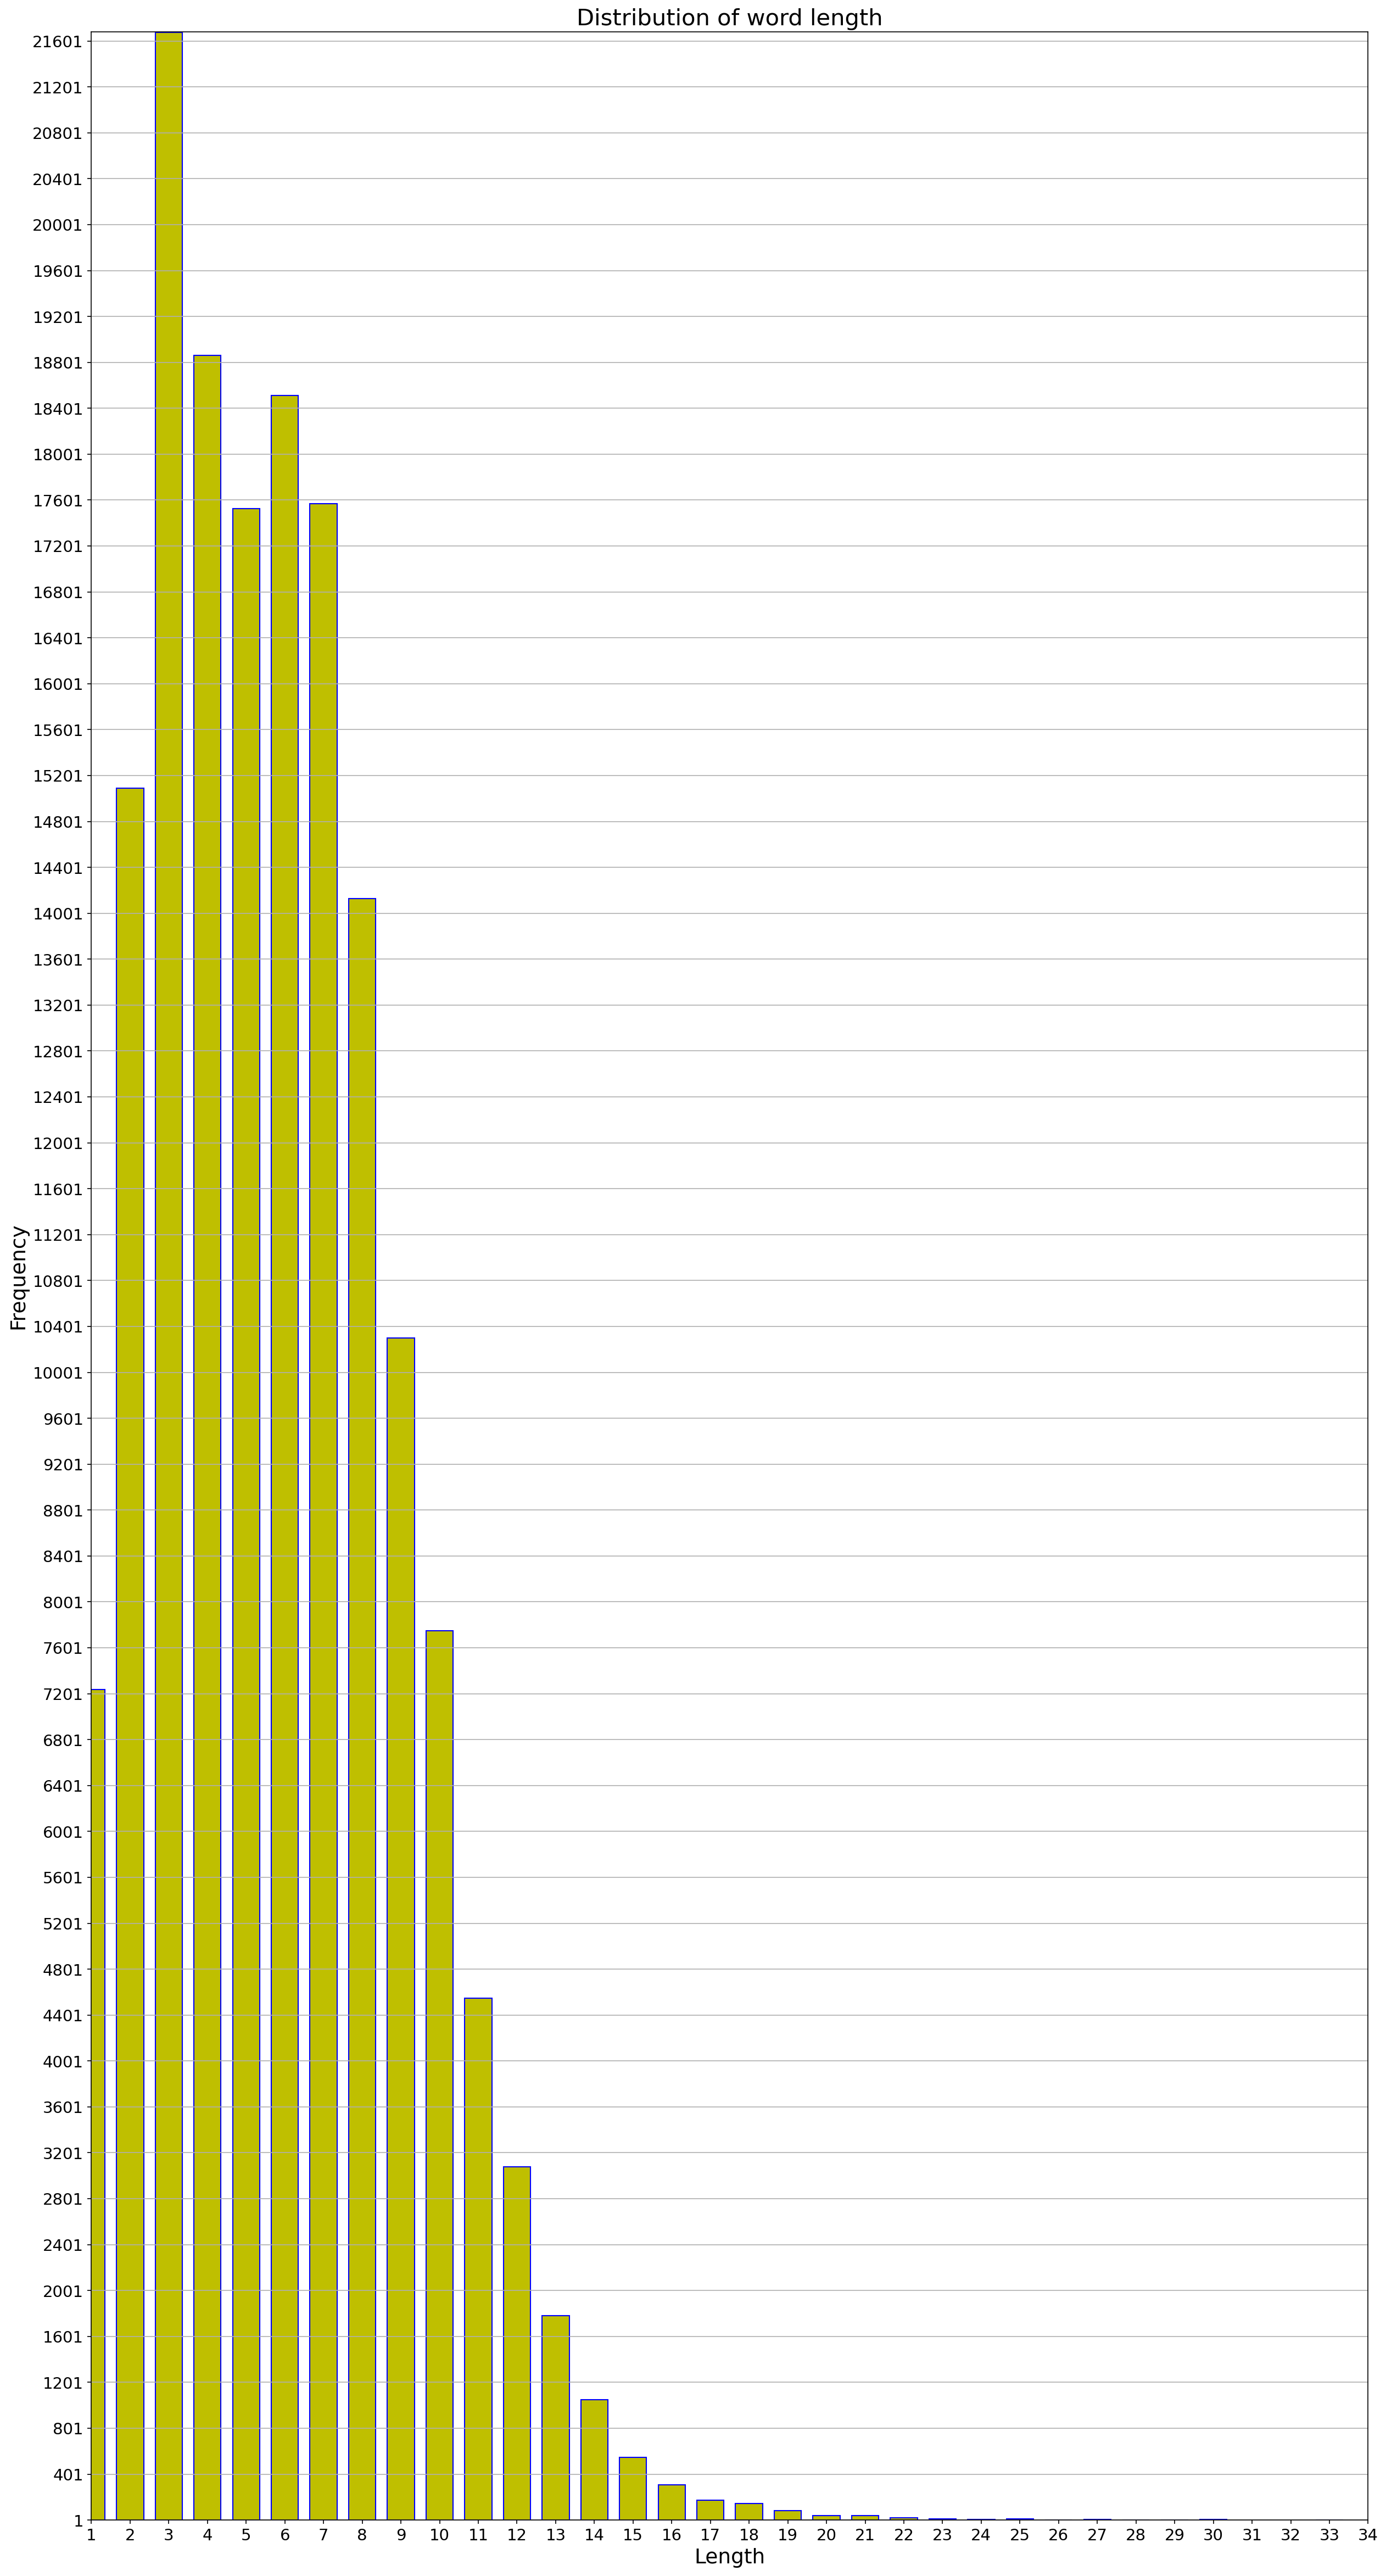

In [60]:
x6 = np.array(len_list_corpus) # set length as x-values
y6 = np.array(freq_list_corpus) # set freqeuncy as y_values
plt.figure(figsize = (20,40),dpi = 150) 
plt.ylabel("Frequency",fontsize = 18)
plt.xlabel("Length", fontsize = 18)
plt.title("Distribution of word length", fontsize = 20)
plt.xticks(range(1,max(len_list_corpus)+2,1),fontsize = 14)
plt.yticks(range(1,max(freq_list_corpus)+5,400),fontsize = 14)
plt.axis([1,max(len_list_corpus)+1,1,max(freq_list_corpus)+5])
plt.bar(x6,y6, facecolor = "y", edgecolor = "b", width = 0.7) # set bars
plt.grid(axis = "y")
plt.show()

### distribution of length of word types in Spanish

In [ ]:
nltk.download("cess_esp")

In [37]:
from nltk.corpus import cess_esp
vocab_es = []
for token in cess_esp.words():
    if token.isalpha() and not token in vocab_es:
        vocab_es.append(token.lower()) # extract lowered word types from a corpus
vocab_es_len = Counter([len(word) for word in vocab_es]) # count frequecy of length
len_list_corpus = list(vocab_es_len.keys())
freq_list_corpus = list(vocab_es_len.values())

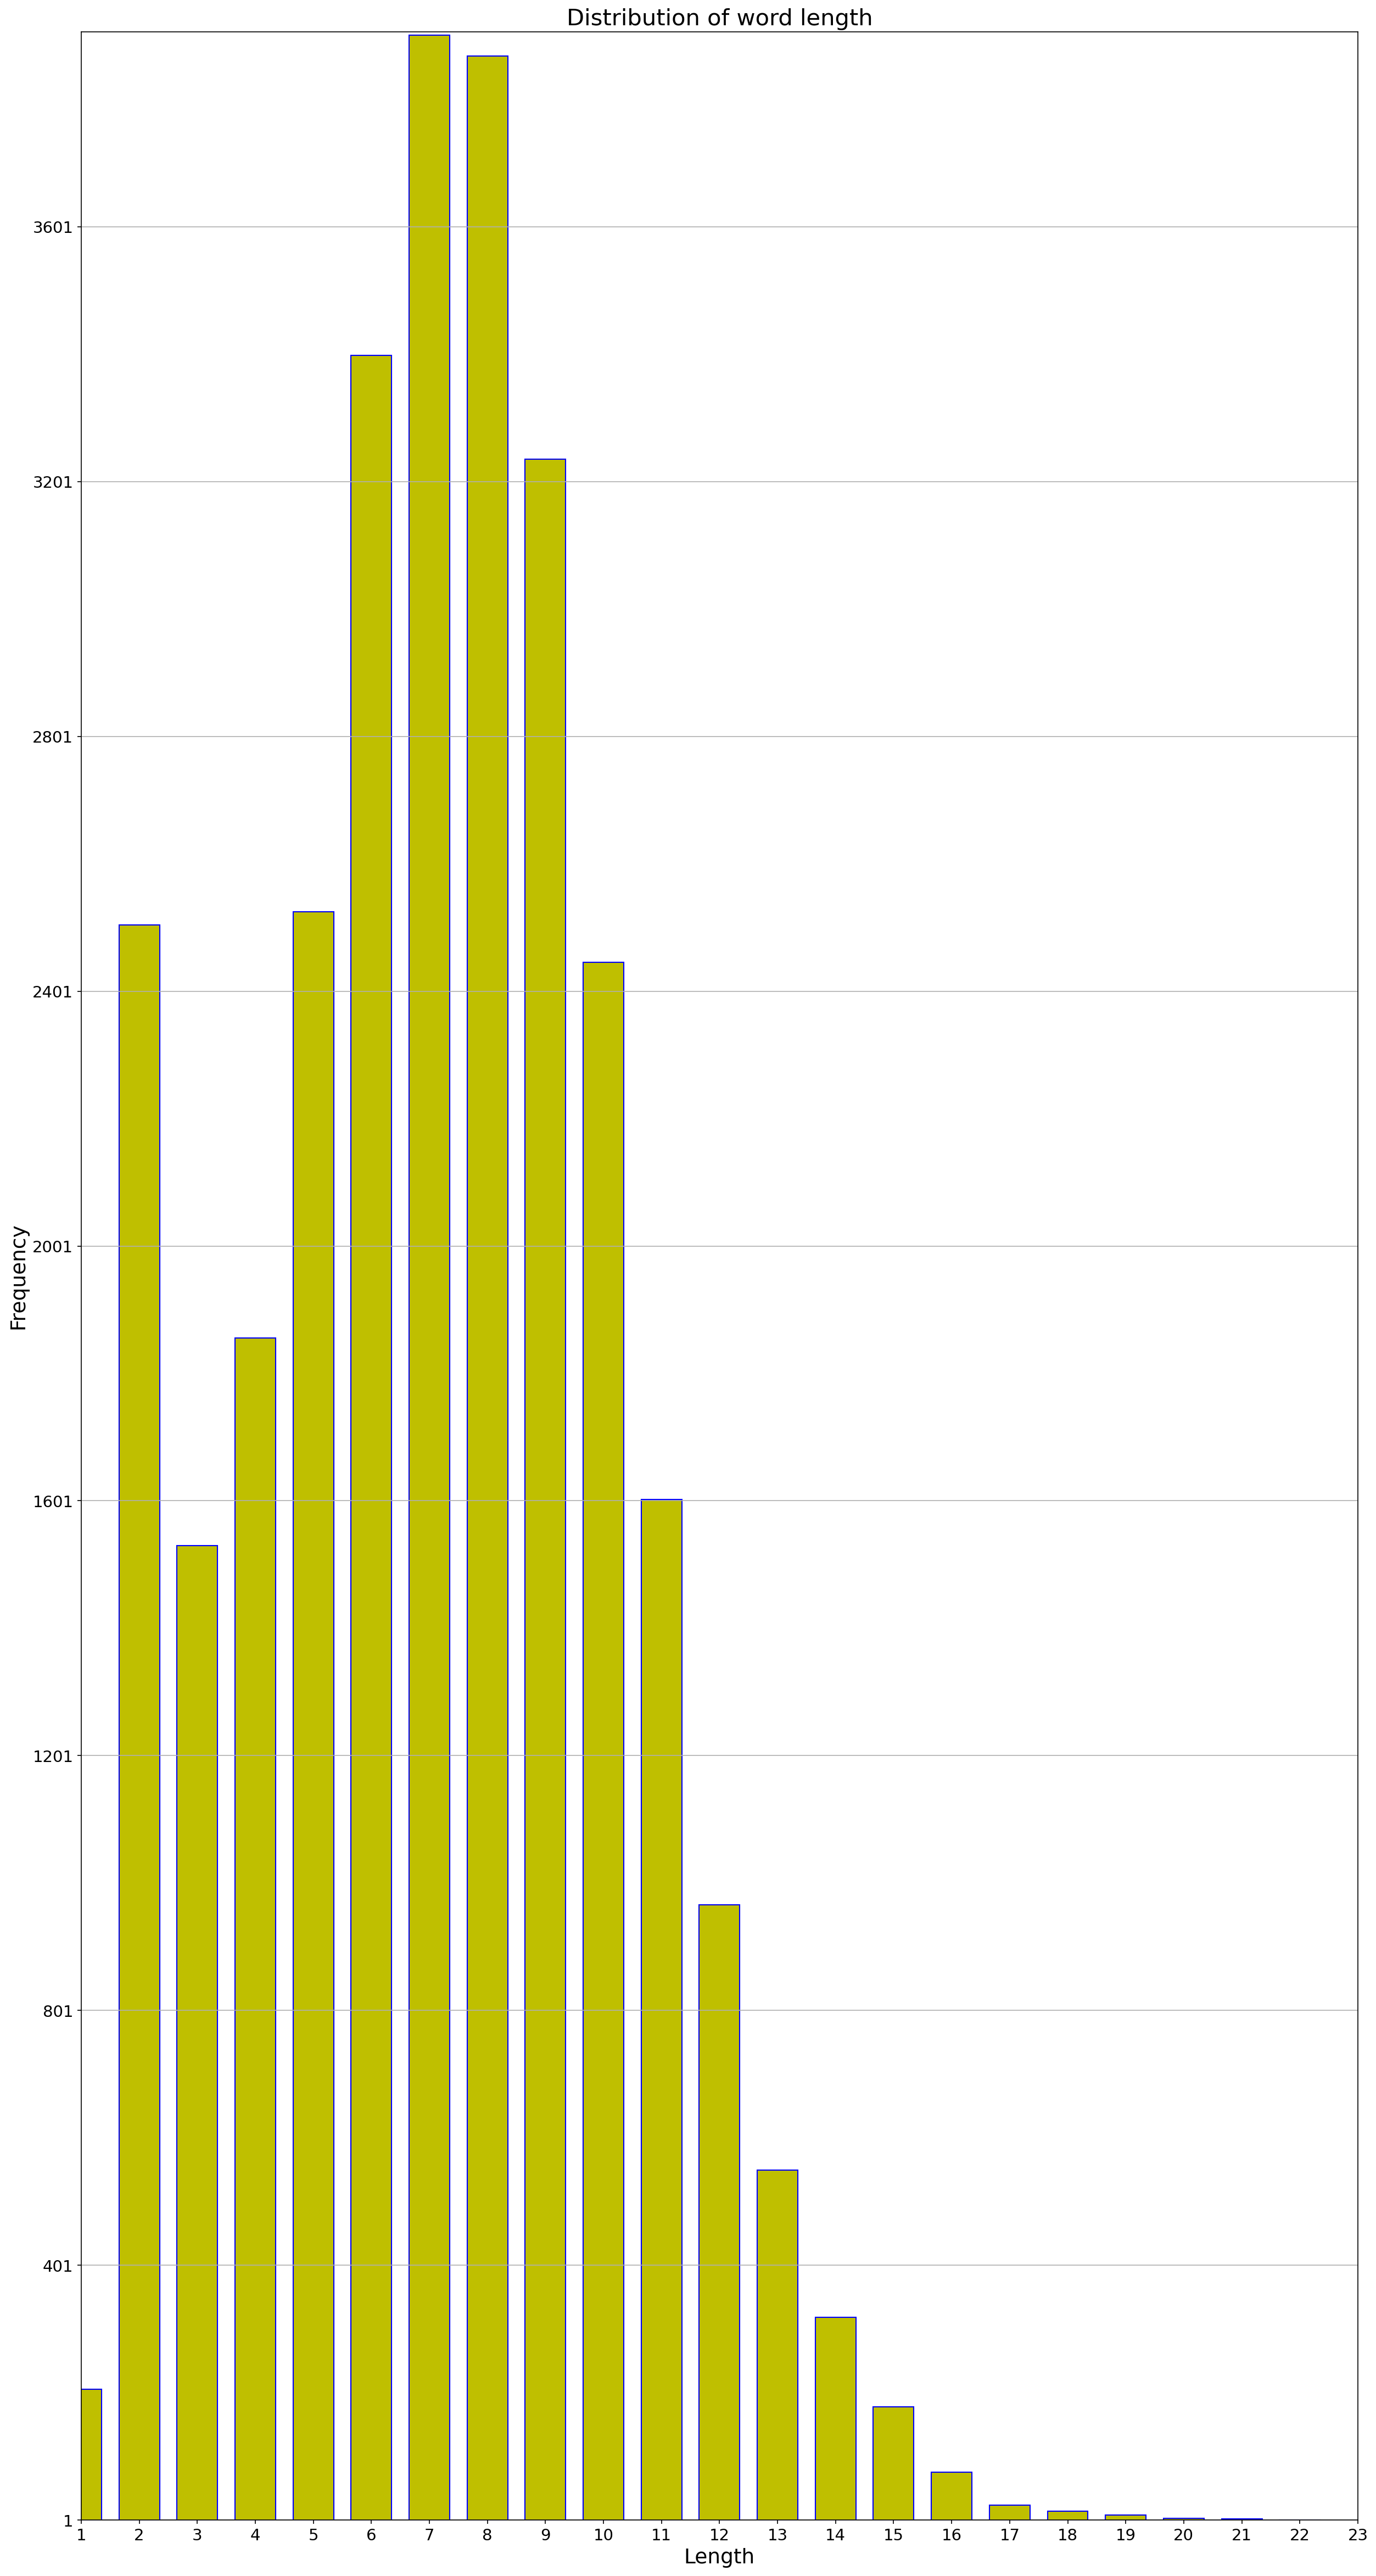

In [38]:
x6 = np.array(len_list_corpus) # set length as x-values
y6 = np.array(freq_list_corpus) # set freqeuncy as y_values
plt.figure(figsize = (20,40),dpi = 150) 
plt.ylabel("Frequency",fontsize = 18)
plt.xlabel("Length", fontsize = 18)
plt.title("Distribution of word length", fontsize = 20)
plt.xticks(range(1,max(len_list_corpus)+2,1),fontsize = 14)
plt.yticks(range(1,max(freq_list_corpus)+5,400),fontsize = 14)
plt.axis([1,max(len_list_corpus)+1,1,max(freq_list_corpus)+5])
plt.bar(x6,y6, facecolor = "y", edgecolor = "b", width = 0.7) # set bars
plt.grid(axis = "y")
plt.show()